## NPC Real Estate EDA
### By Victory Okechukwu

### Introduction

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Loading the dataset
df = pd.read_csv('Real_estate_clean.csv')

In [3]:
# Checking the dataframe
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


In [4]:
# Checking Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          4912 non-null   object
 1   Price         4912 non-null   int64 
 2   Location      4912 non-null   object
 3   Bedroom       4912 non-null   int64 
 4   PropertyType  4912 non-null   object
dtypes: int64(2), object(3)
memory usage: 192.0+ KB


### Preliminary cleaning

In [5]:
# Changing datatype of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4912 non-null   datetime64[ns]
 1   Price         4912 non-null   int64         
 2   Location      4912 non-null   object        
 3   Bedroom       4912 non-null   int64         
 4   PropertyType  4912 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 192.0+ KB


In [6]:
# House at jabi for N35,000 is too low
df.iloc[4162:4165]

,Date,Price,Location,Bedroom,PropertyType
4162,2022-02-03,37000000,Life Camp,3,house
4163,2022-02-02,35000,Jabi,1,detached duplex
4164,2022-02-02,190000000,Guzape District,6,detached duplex


In [7]:
# Dropping the jabi entry
df = df.drop(index=4163)
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-05-01,400000000,Apo,6,house
2,2022-10-02,56000000,Gwarinpa,3,terraced duplex
3,2022-10-02,75000000,Asokoro District,3,house
4,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex


In [8]:
# Dropping entries above 4 billion overall and above 1 billion except in some districts 
df = df.drop(index=df[df['Price'] > 4e+9].index)
df = df.drop(index=df[~df['Location'].isin(['Asokoro District','Maitama District','Guzape District','Wuse 2'])
                & (df['Price'] > 1e+9)].index)

# Dropping entries with property type of block of flats and houses
df = df.drop(index=df[(df['PropertyType'].isin(['block of flats','house']))].index).reset_index(drop=True)

In [9]:
# Dropping entries with locations that have less than 10 entries
locations = df['Location'].value_counts().to_frame()[df['Location']
            .value_counts().to_frame()['Location'] > 10].index.values.tolist()
df = df[df['Location'].isin(locations)]
df.head()

,Date,Price,Location,Bedroom,PropertyType
0,2021-08-21,42500000,Kaura,4,terraced duplex
1,2022-10-02,56000000,Gwarinpa,3,terraced duplex
2,2022-08-08,75000000,Gwarinpa,4,semi-detached duplex
3,2022-05-19,55000000,Kubwa,5,detached duplex
4,2021-10-13,34500000,Kubwa,3,terraced duplex


In [10]:
# Dividing property types into two types
df['PropertyType1'] = df['PropertyType'].str.split(' ',expand=True)[0]
df['PropertyType2'] = df['PropertyType'].str.split(' ',expand=True)[1]
df= df.drop(axis=1,columns='PropertyType')
df.head()

,Date,Price,Location,Bedroom,PropertyType1,PropertyType2
0,2021-08-21,42500000,Kaura,4,terraced,duplex
1,2022-10-02,56000000,Gwarinpa,3,terraced,duplex
2,2022-08-08,75000000,Gwarinpa,4,semi-detached,duplex
3,2022-05-19,55000000,Kubwa,5,detached,duplex
4,2021-10-13,34500000,Kubwa,3,terraced,duplex


In [11]:
# Checking for duplicated entries
df[df.duplicated()].shape

(46, 6)

In [12]:
# Dropping duplicated entries
df = df.drop_duplicates(ignore_index=True)

In [13]:
# Checking for duplicated entries
df[df.duplicated()].shape

(0, 6)

### Univariate Exploration

#### Location

In [14]:
# Checking statistics of main variable
df['Location'].describe()

count                4074
unique                 31
top       Guzape District
freq                  483
Name: Location, dtype: object

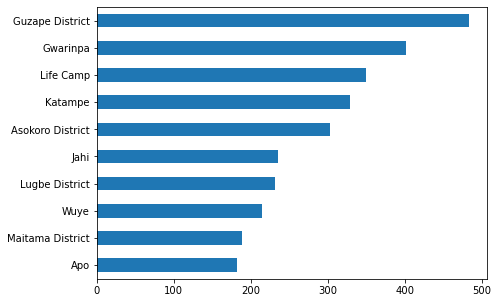

In [15]:
# Plotting counts of houses for sale in different locations
plt.figure(figsize=[7,5])
df['Location'].value_counts().head(10).plot(kind='barh').invert_yaxis()

This shows the number of houses for sale across the various locations, the guzape district has the most houses put on for sale 

#### Price

In [16]:
# Checking statistics of price
df['Price'].describe()

count    4.074000e+03
mean     2.404762e+08
std      3.509509e+08
min      6.000000e+06
25%      7.000000e+07
50%      1.200000e+08
75%      2.500000e+08
max      4.000000e+09
Name: Price, dtype: float64

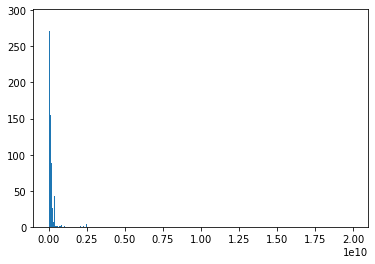

In [17]:
# Ploting price of houses in abuja
bins = np.arange(1.95e+6,2e+10,1e+7)
plt.hist(data=df, x='Price',bins=bins);

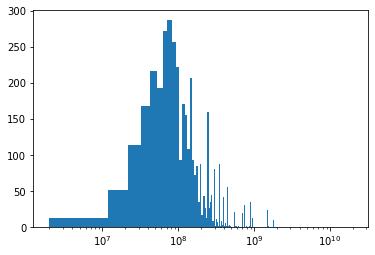

In [18]:
# Ploting price of houses in abuja with log scale
bins = np.arange(1.95e+6,2e+10,1e+7)
plt.hist(data=df, x='Price',bins=bins)
plt.xscale('log');

In [19]:
df['Price'].describe()

count    4.074000e+03
mean     2.404762e+08
std      3.509509e+08
min      6.000000e+06
25%      7.000000e+07
50%      1.200000e+08
75%      2.500000e+08
max      4.000000e+09
Name: Price, dtype: float64

This shows that the prices of houses are highly skewed to the right, plotting the price on a logrithm scale was able to visualize the data better, this shows that most of the house in abuja fall inbetween the range of 70 million and 250 million

#### Property Types

In [20]:
# Defining a function for plotting barchart
def ploty(x):
    df[x].value_counts().head(10).plot(kind='bar')
    plt.title('Count of {}'.format(x))
    plt.xlabel('Count')
    plt.ylabel(x)
    plt.xticks(rotation=0)

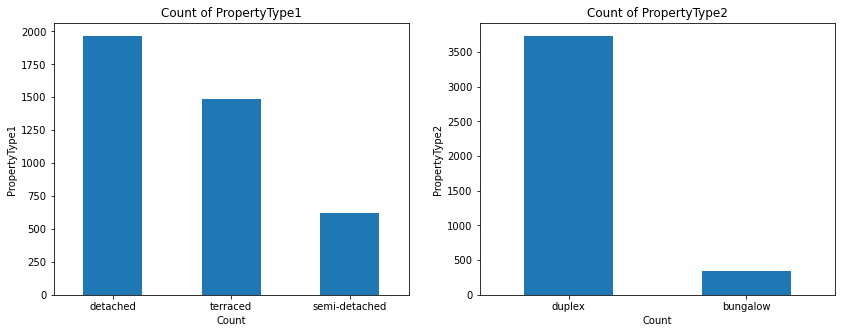

In [21]:
# Plotting barchart for count of Property types
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
ploty(x='PropertyType1')
plt.subplot(1,2,2)
ploty(x='PropertyType2')

For the property types the most popular houses on sales are the detached houses. The duplex type of houses are sold more than the bungalow's

#### Bedroom

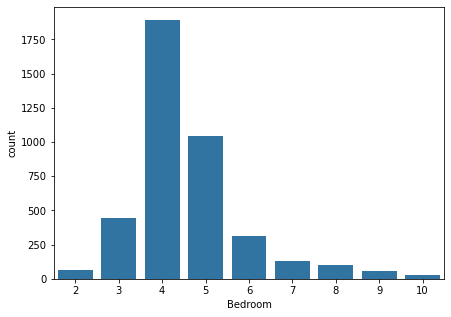

In [22]:
# Plotting of barchart for count of bedrooms
base_color = sb.color_palette()[0]
plt.figure(figsize=[7,5])
sb.countplot(data=df, x='Bedroom',color=base_color);

Houses with 4 bedrooms are the most sold houses in abuja

#### Date

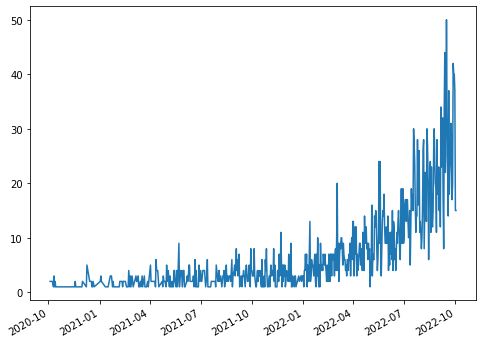

In [23]:
# plotting time series of bedroom counts
plt.figure(figsize=[8,6])
df['Date'].value_counts().plot(kind='line');

This shows that most of the houses on the site was posted of recent

### Bivariate Exploration

In [24]:
# Checking dataframe
df.head()

,Date,Price,Location,Bedroom,PropertyType1,PropertyType2
0,2021-08-21,42500000,Kaura,4,terraced,duplex
1,2022-10-02,56000000,Gwarinpa,3,terraced,duplex
2,2022-08-08,75000000,Gwarinpa,4,semi-detached,duplex
3,2022-05-19,55000000,Kubwa,5,detached,duplex
4,2021-10-13,34500000,Kubwa,3,terraced,duplex


#### Location and Price

In [25]:
# Top 10 locations with expensive houses
df.groupby('Location').mean().sort_values('Price',ascending=False).head(10)['Price']

Location
Maitama District    8.815185e+08
Asokoro District    6.818845e+08
Wuse 2              4.088333e+08
Guzape District     3.206932e+08
Katampe             2.976736e+08
Jabi                2.358750e+08
Wuse                2.304082e+08
Utako               1.875000e+08
Wuye                1.826774e+08
Kado                1.770513e+08
Name: Price, dtype: float64

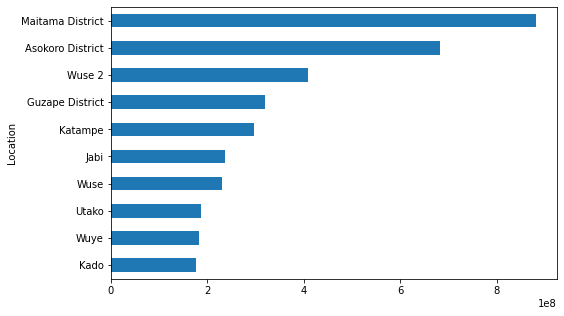

In [26]:
# Plotting top 10  locations with expensive houses 
plt.figure(figsize=[8,5])
df.groupby('Location').mean().sort_values('Price',ascending=False).head(10)['Price'].plot(kind='barh')
plt.gca().invert_yaxis()

This shows that the most expensive houses in abuja area sold in the maitama district, asokoro district and guzape district

#### Location and Property types

In [27]:
# Top 10 locations with highest housing vacancies
df['Location'].value_counts().head(10).index.values

array(['Guzape District', 'Gwarinpa', 'Life Camp', 'Katampe',
       'Asokoro District', 'Jahi', 'Lugbe District', 'Wuye',
       'Maitama District', 'Apo'], dtype=object)

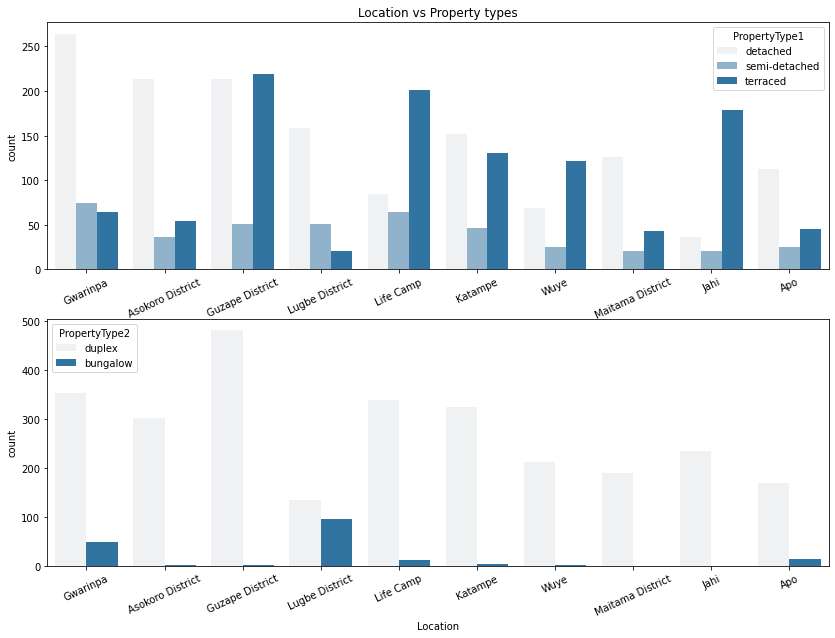

In [28]:
# Plotting counts of houses for sale in according to locations and property types
base_color = sb.color_palette()[0]
plt.figure(figsize=[14,10])
plt.subplot(2,1,1)
top_10 = df[df['Location'].isin(df['Location'].value_counts().head(10).index.values)]
sb.countplot(data=top_10,x='Location',hue='PropertyType1',
             hue_order=['detached','semi-detached','terraced'],color=base_color)
plt.xticks(rotation=25)
plt.title('Location vs Property types')
plt.subplot(2,1,2)
sb.countplot(data=top_10,x='Location',hue='PropertyType2', color=base_color)
plt.xticks(rotation=25);

This shows that the detached houses in gwarinpa are the most frequently sold houses, and the most house sold are the duplex's in Guzape district. In General the duplex's sold are more than the bungalows in abuja

#### Location and bedroom

In [29]:
Top_10 = df[df['Location'].isin(df.groupby('Location').mean().sort_values
                       ('Price',ascending=False).head(10)['Price'].index.values)]

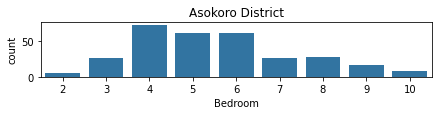

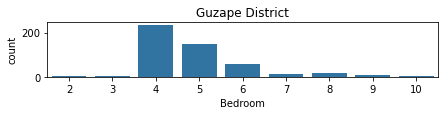

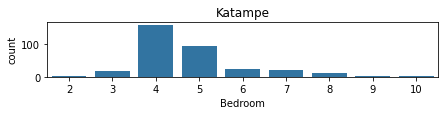

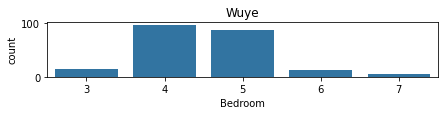

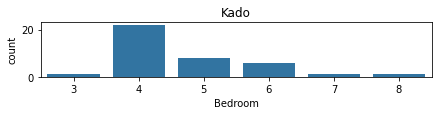

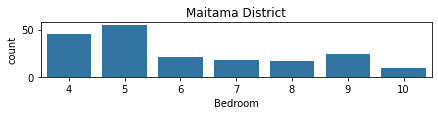

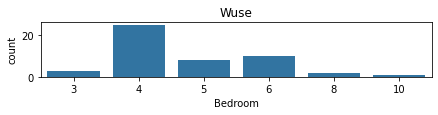

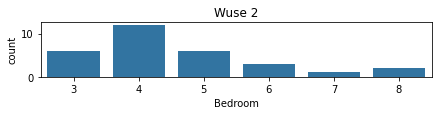

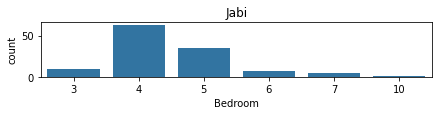

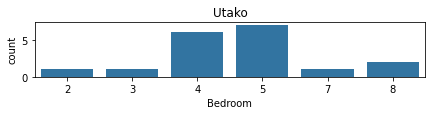

In [30]:
# Looping a barchart plot across top 10 locations
for i in Top_10['Location'].unique():
    used_df = Top_10[Top_10['Location'] == i]
    plt.subplots(figsize=[7,1])
    plt.title(i)
    sb.countplot(data=used_df,x='Bedroom',color=base_color);

#### Date and Price

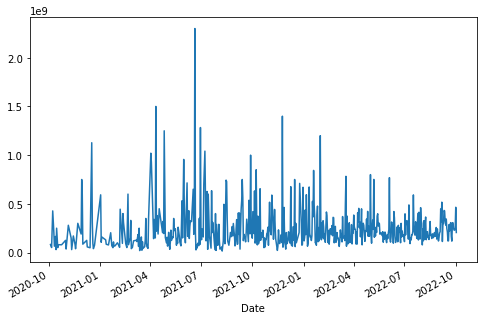

In [31]:
# Plotting Time series of average prices across dates
plt.figure(figsize=[8,5])
df.groupby(df['Date']).mean()['Price'].plot(kind='line');

### Multivariate Exploration

#### Location, Price and Date

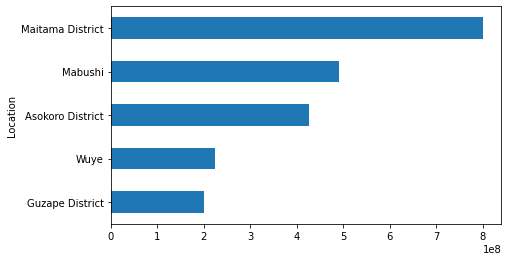

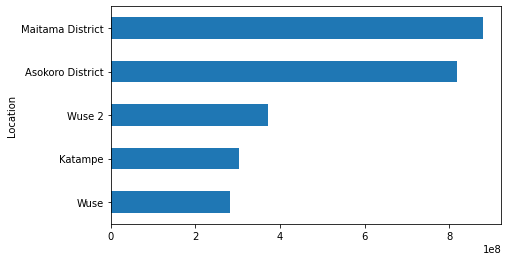

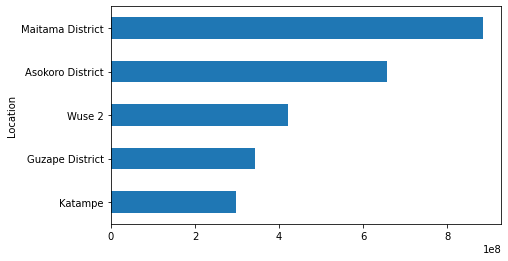

In [32]:
# Plotting barcharts of location vs time in different years
df_2020 = df[df['Date'].dt.year == 2020]
df_2021 = df[df['Date'].dt.year == 2021]
df_2022 = df[df['Date'].dt.year == 2022]
for i in [df_2020,df_2021,df_2022]:  
    plt.subplots(figsize=[7,4])
    i.groupby('Location').mean().sort_values('Price',
                                             ascending=False).head(5)['Price'].plot(kind='barh').invert_yaxis()

#### Location, Price and Bedroom

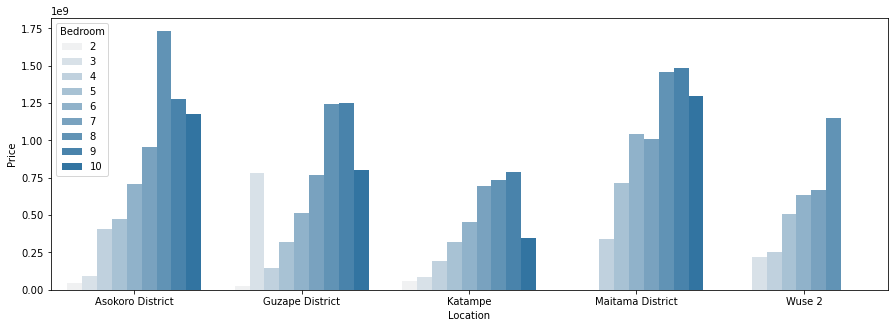

In [33]:
# Creating a subset of with top 5 locations ordered by average price
Top_5 = df[df['Location'].isin(df.groupby('Location').mean().sort_values
                       ('Price',ascending=False).head(5)['Price'].index.values)]
# Plotting the bedrooms across top 5 locations 
plt.figure(figsize=[15,5])
sb.barplot(data=Top_5.groupby(['Location','Bedroom']).
           mean().reset_index(),x='Location',y='Price',hue='Bedroom',color=base_color)
plt.legend;

#### Location, Price and Property types

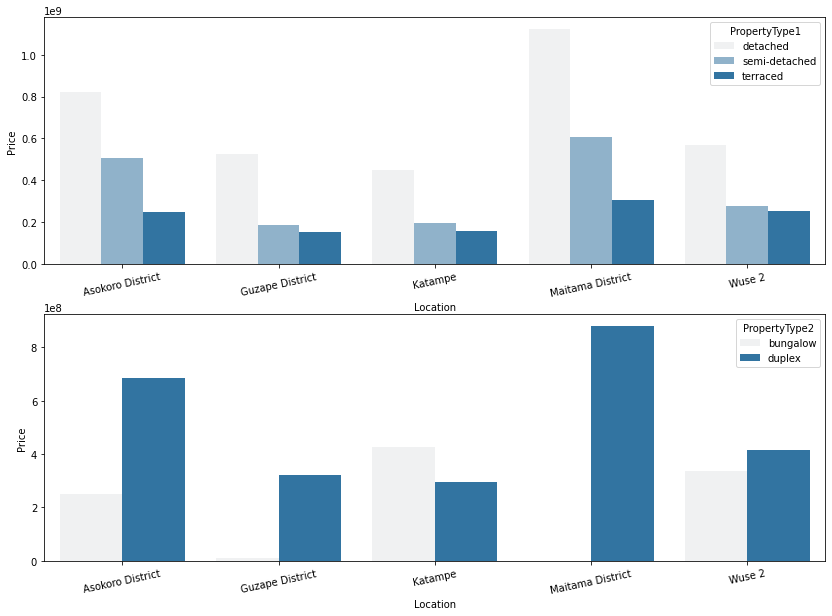

In [34]:
# Plotting property types across top 5 locations
base_color = sb.color_palette()[0]
plt.figure(figsize=[14,10])
plt.subplot(2,1,1)
sb.barplot(data=Top_5.groupby(['Location','PropertyType1']).
           mean().reset_index(),x='Location',y='Price',hue='PropertyType1',color=base_color)
plt.xticks(rotation=12)
plt.subplot(2,1,2)
sb.barplot(data=Top_5.groupby(['Location','PropertyType2']).
           mean().reset_index(),x='Location',y='Price',hue='PropertyType2',color=base_color)
plt.xticks(rotation=12);